In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/books.csv')
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPrÃ©,4.57,439785960,9.78044E+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPrÃ©,4.49,439358078,9.78044E+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.78044E+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPrÃ©,4.56,043965548X,9.78044E+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPrÃ©,4.78,439682584,9.78044E+12,eng,2690,41428,164,9/13/2004,Scholastic


In [3]:
df.describe()

,bookID,ratings_count,text_reviews_count
count,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,1.793649e+04,541.864474
std,13093.358023,1.124794e+05,2576.174610
min,1.000000,0.000000e+00,0.000000
25%,10287.000000,1.040000e+02,9.000000
50%,20287.000000,7.450000e+02,47.000000
75%,32104.500000,4.993500e+03,237.500000
max,45641.000000,4.597666e+06,94265.000000


In [4]:
df['title'].nunique()

10352

In [5]:
df['isbn'].nunique()

11126

In [6]:
df[df['ratings_count'] <30]['title'].count()

1426

In [7]:
#Eliminating books with less than 30 reviews for analysis
df = df[df['ratings_count'] > 29]

In [11]:
df['language_code'].value_counts()

language_code
eng    9393
Name: count, dtype: int64

In [9]:
#Remove non-english books
df['language_code'] = df['language_code'].replace({'en-US':'eng','en-GB':'eng','en-CA':'eng'})
df  =  df[df['language_code'] == 'eng']

In [12]:
df.dtypes

bookID                 int64
title                 object
authors               object
average_rating        object
isbn                  object
isbn13                object
language_code         object
  num_pages           object
ratings_count          int64
text_reviews_count     int64
publication_date      object
publisher             object
dtype: object

In [23]:
#clean and convert num_pages to integer
df = df.rename(columns = {'  num_pages':'num_pages'})
df['num_pages'] = df['num_pages'].astype('int')

In [48]:
df['year'] = df['publication_date'].str.strip().str[-4:]
df['year'] = df['year'].astype('int')

In [74]:
df['average_rating'] = df['average_rating'].astype('float')

In [94]:
number_of_books = df[['authors','title']].groupby('authors').count()
number_of_books = number_of_books.rename(columns={'title':'number_of_books'})
df = df.merge(number_of_books, on = 'authors')

In [89]:
import matplotlib.pyplot as plt

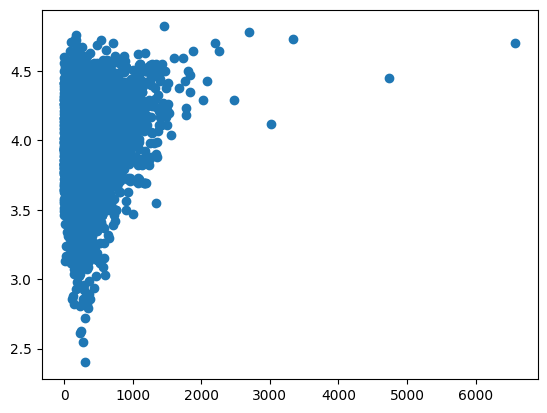

In [77]:
plt.scatter(df['num_pages'],df['average_rating'])

In [100]:
quant_columns = ['average_rating','num_pages','ratings_count','text_reviews_count','year','number_of_books']

In [101]:
df[quant_columns].corr()

,average_rating,num_pages,ratings_count,text_reviews_count,year,number_of_books
average_rating,1.000000,0.199698,0.045741,0.036382,-0.069823,-0.021237
num_pages,0.199698,1.000000,0.031456,0.032932,-0.032647,0.056380
ratings_count,0.045741,0.031456,1.000000,0.865626,0.045275,0.056181
text_reviews_count,0.036382,0.032932,0.865626,1.000000,0.069442,0.046375
year,-0.069823,-0.032647,0.045275,0.069442,1.000000,-0.000212
number_of_books,-0.021237,0.056380,0.056181,0.046375,-0.000212,1.000000


In [95]:
#average rating
df[['authors','average_rating','number_of_books']].groupby('authors').mean().sort_values('average_rating',ascending = False)

,average_rating,number_of_books
authors,,
Saul Leiter/Martin Harrison,4.730000,1.0
Murray Sayle/Charles Flowers/Elliott Erwitt,4.720000,1.0
Bill Watterson,4.708571,7.0
Anonymous,4.700000,1.0
David Allen Sibley,4.690000,1.0
...,...,...
Howard Chaykin/Michelle Madsen,2.820000,1.0
Sarah Fielding/Candace Ward,2.630000,1.0
Penny Jordan,2.610000,1.0


In [96]:
#average ratings for authors with more than 1 book
df[df['number_of_books']>1][['authors','average_rating','number_of_books']].groupby('authors').mean().sort_values('average_rating',ascending = False)

,average_rating,number_of_books
authors,,
Bill Watterson,4.708571,7.0
Richard P. Feynman/Robert B. Leighton/Matthew L. Sands,4.615000,2.0
Hayao Miyazaki/Matt Thorn/Kaori Inoue/Joe Yamazaki/Walden Wong/Izumi Evers,4.613333,3.0
Arthur Conan Doyle/Leslie S. Klinger,4.585000,2.0
Don Rosa,4.575000,2.0
...,...,...
Diane Johnson,3.195000,2.0
Gregory Maguire/Douglas Smith,3.175000,2.0
Robb Forman Dew,3.160000,2.0
